In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [2]:
df = pd.read_csv("CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df_clean = df.drop(columns=["CUST_ID"])

In [5]:
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

In [6]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

In [7]:
inertia = []
silhouette_scores = []
k_range = range(2, 11) #2–10 is enough to observe an "elbow" point, k=1 means to put all in 1 cluster
for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(data_scaled)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

Text(0, 0.5, 'Inertia')

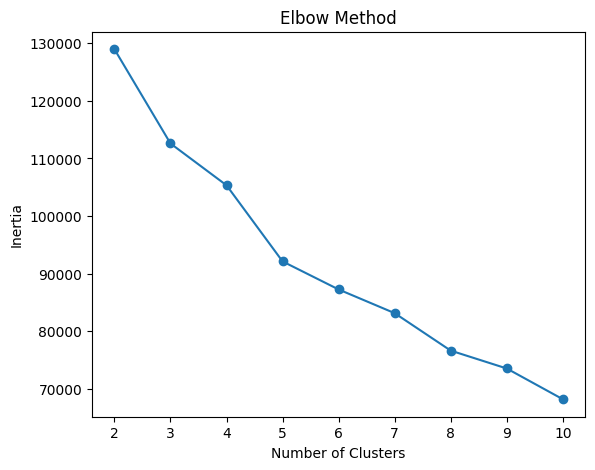

In [8]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

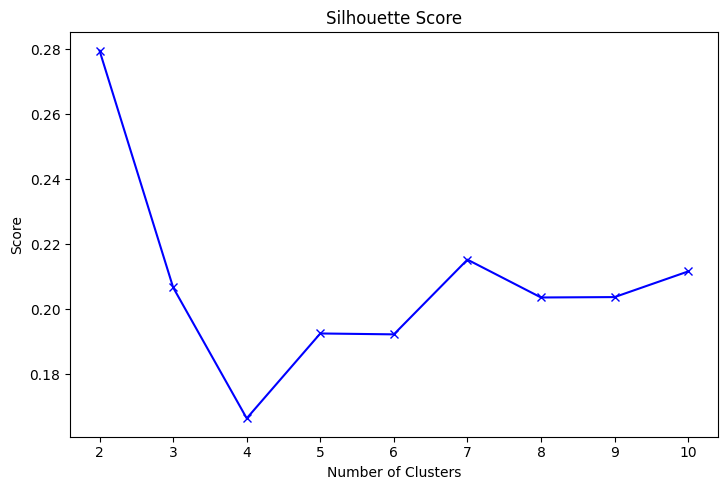

In [9]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, marker='x', color='blue')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [10]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_imputed['Cluster'] = kmeans.fit_predict(data_scaled)

In [11]:
cluster_profiles = data_imputed.groupby('Cluster').mean()
print(cluster_profiles)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


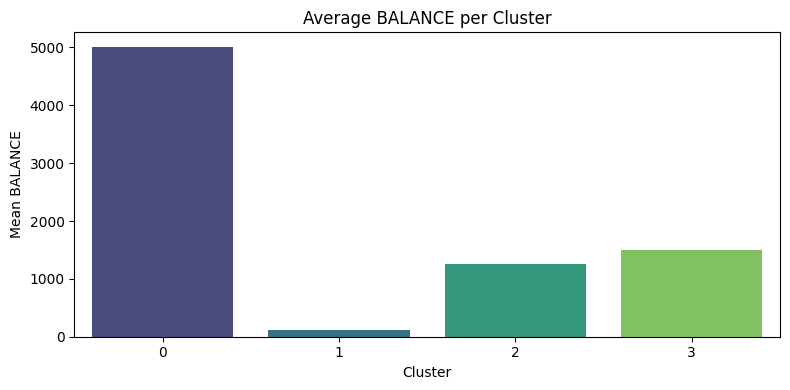

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


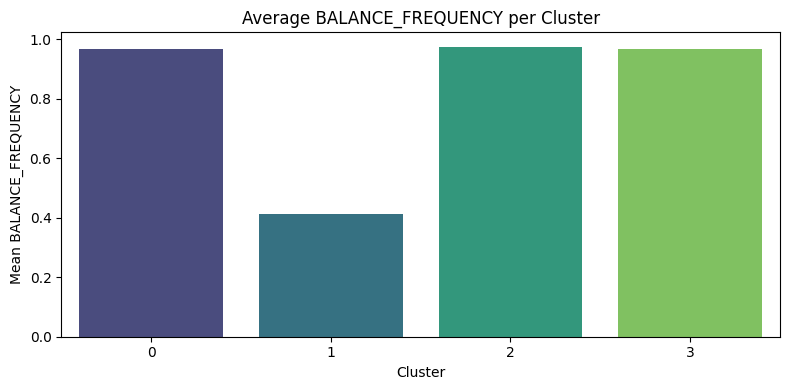

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


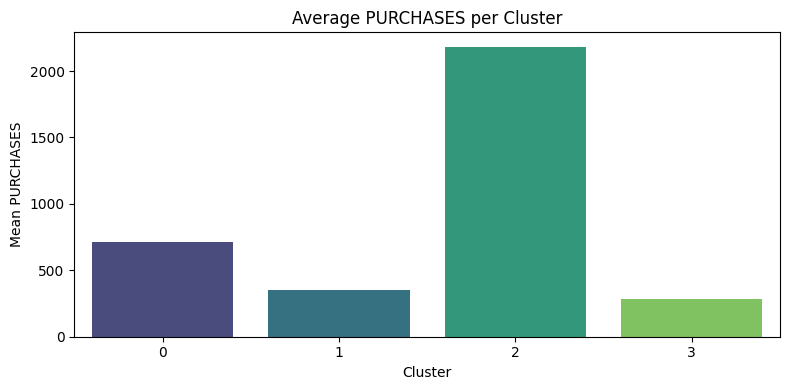

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


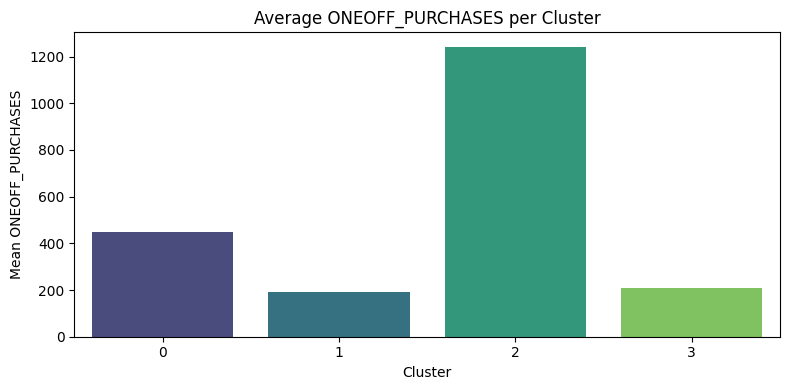

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


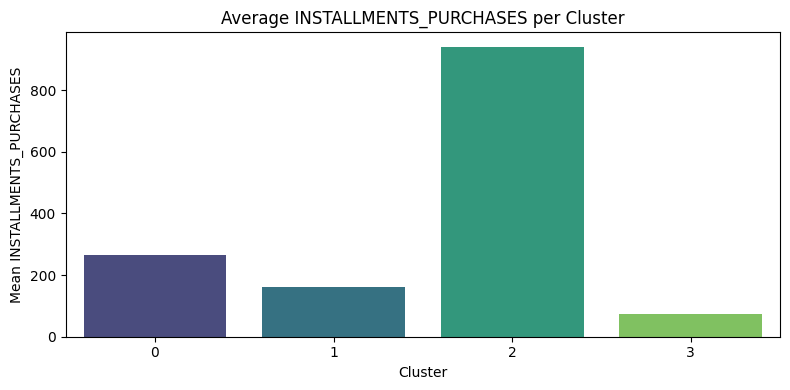

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


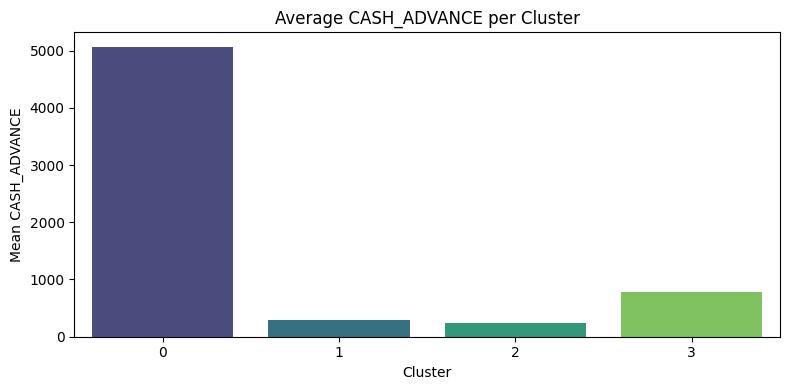

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


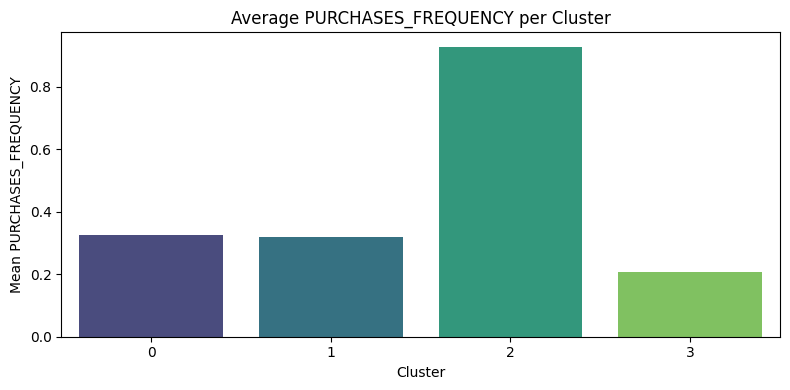

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


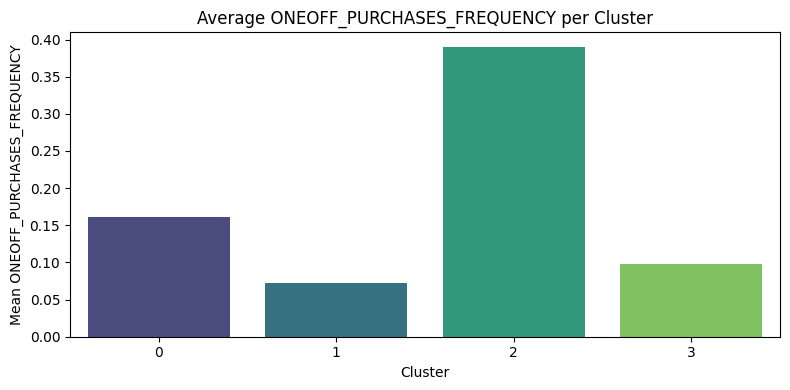

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


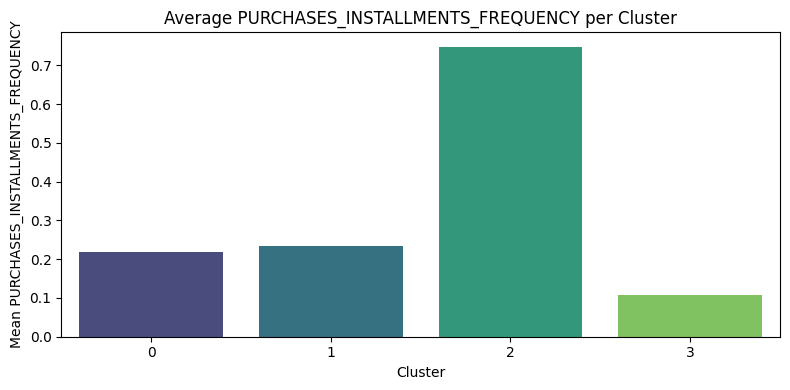

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


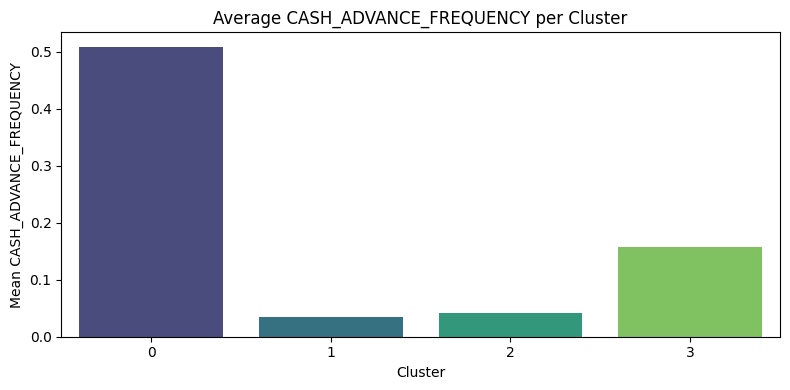

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


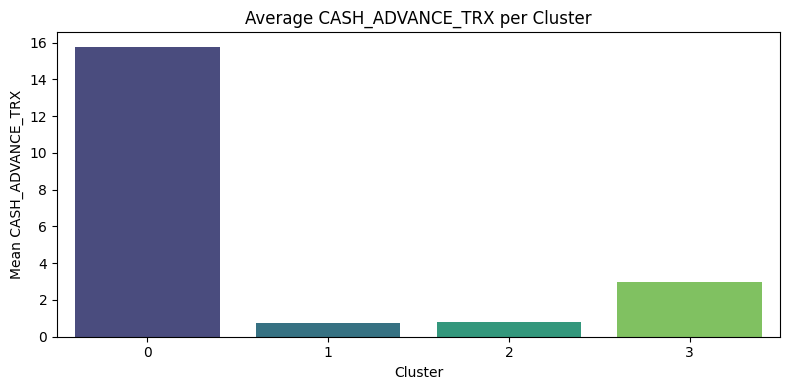

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


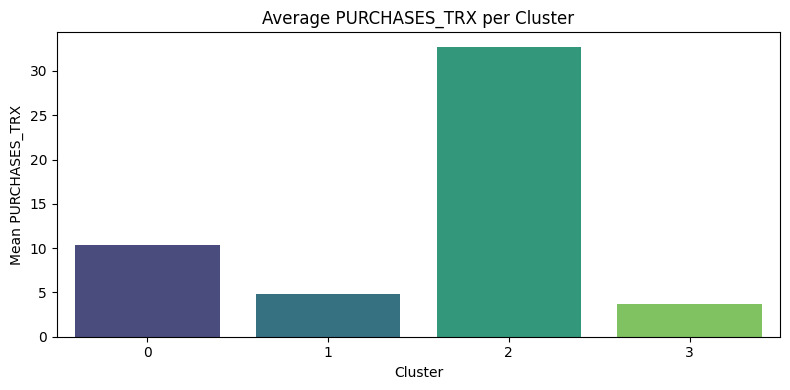

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


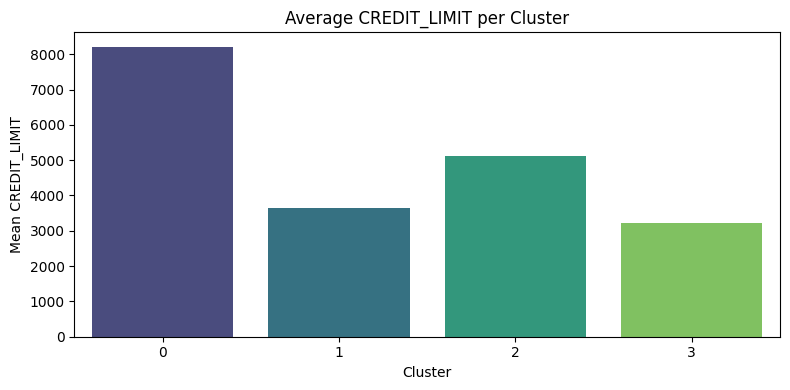

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


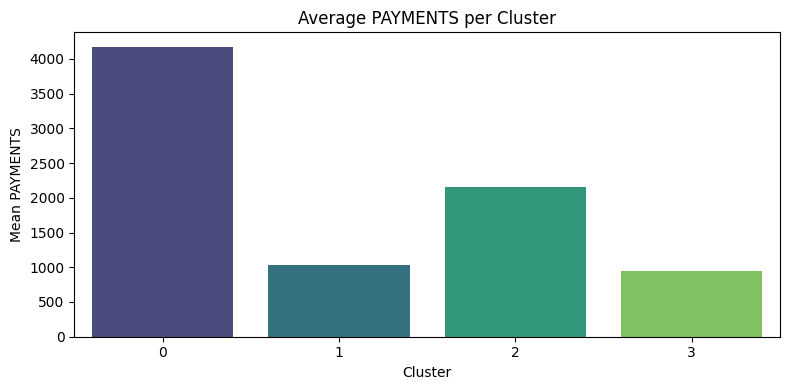

<ipython-input-12-e05df003e360>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')


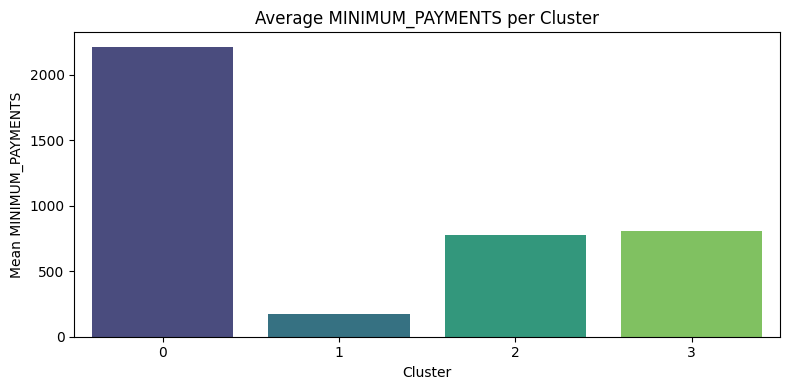

In [12]:
cluster_profiles = data_imputed.groupby('Cluster').mean()

for feature in cluster_profiles.columns[:-2]:  # Skip 'PCA1', 'PCA2'
    plt.figure(figsize=(8, 4))
    sns.barplot(x=cluster_profiles.index, y=cluster_profiles[feature], palette='viridis')
    plt.title(f'Average {feature} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')
    plt.tight_layout()
    plt.show()


In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data_imputed['PCA1'] = pca_result[:, 0]
data_imputed['PCA2'] = pca_result[:, 1]

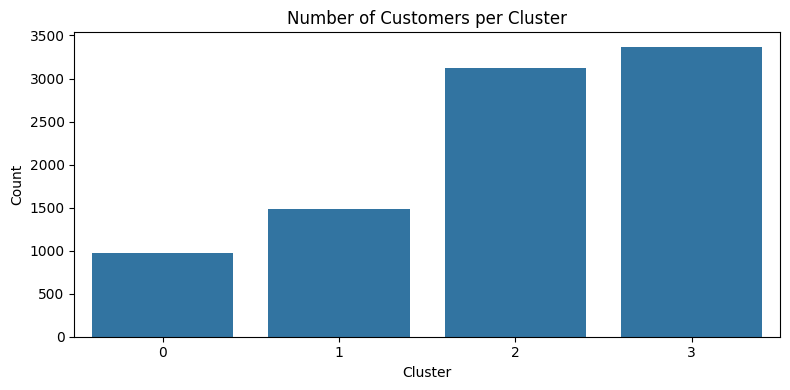

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=data_imputed)
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-15-7e736d95adc5>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x='Cluster', y='Mean Value', hue='PCA Component', data=pca_means_melted,color = 'blue')


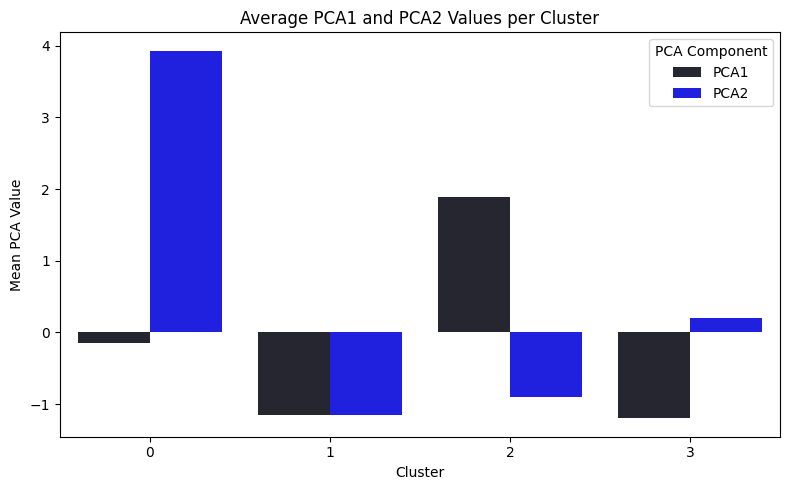

In [15]:
pca_means = data_imputed.groupby('Cluster')[['PCA1', 'PCA2']].mean().reset_index()
pca_means_melted = pd.melt(pca_means, id_vars='Cluster', var_name='PCA Component', value_name='Mean Value')

plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Mean Value', hue='PCA Component', data=pca_means_melted,color = 'blue')
plt.title('Average PCA1 and PCA2 Values per Cluster')
plt.ylabel('Mean PCA Value')
plt.tight_layout()
plt.show()


In [16]:
sil_values = silhouette_samples(data_scaled, data_imputed['Cluster'])
data_imputed['Silhouette'] = sil_values

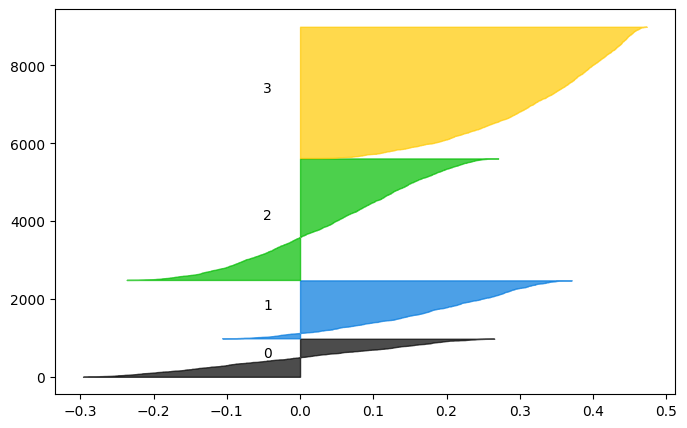

In [17]:
plt.figure(figsize=(8, 5))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_sil = sil_values[data_imputed['Cluster'] == i]
    ith_cluster_sil.sort()
    size_cluster = ith_cluster_sil.shape[0]
    y_upper = y_lower + size_cluster
    color = cm.nipy_spectral(float(i) / optimal_k)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

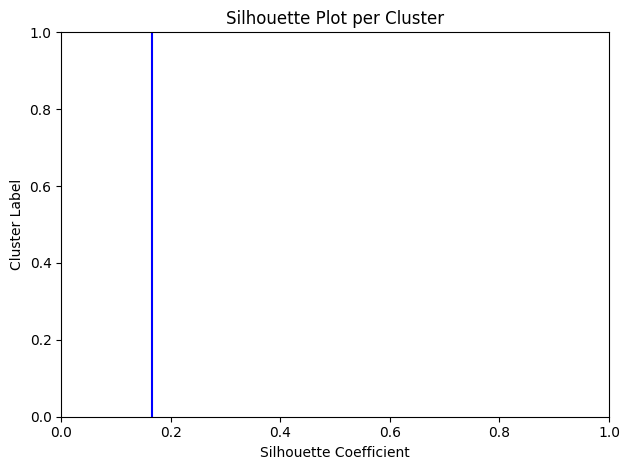

In [19]:
plt.axvline(x=np.mean(sil_values), color="blue")
plt.title("Silhouette Plot per Cluster")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.tight_layout()
plt.show()

In [20]:
print(f"Optimal clusters selected: {optimal_k}")
print(f"Average silhouette score: {np.mean(silhouette_scores)}")
print(f"Total customers clustered: {len(data_imputed)}")

Optimal clusters selected: 4
Average silhouette score: 0.2079884213838426
Total customers clustered: 8950
